<a href="https://colab.research.google.com/github/RafalDoroz/mun/blob/main/lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zbiór danych California Housing:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
Współczynniki regresji (beta): [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Przecięcie osi (beta_0): -37.02327770606391
MSE (Mean Squared Error): 0.5558915986952422
RMSE (Root Mean Squared Error): 0.7455813830127749
R^2 (Coefficient of Determination): 0.5757877060324524


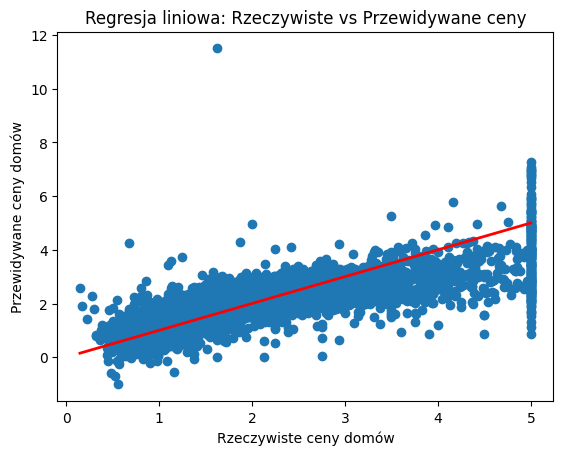

In [2]:
# Importujemy potrzebne biblioteki
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt




In [ ]:
# Wczytujemy dane - California Housing
california = fetch_california_housing()
X = california.data  # dane wejściowe (cechy)
y = california.target  # ceny domów (zmienna docelowa)



In [ ]:
# Tworzymy DataFrame z danymi
california_df = pd.DataFrame(data=X, columns=california.feature_names)
california_df['MEDV'] = y  # Dodajemy kolumnę z cenami domów



In [ ]:
# Wyświetlamy pierwsze 5 wierszy zbioru danych
print("Zbiór danych California Housing:")
print(california_df.head())



In [ ]:
# Podzielmy dane na zbiór treningowy i testowy (80% - trening, 20% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Inicjalizujemy model regresji liniowej
regressor = LinearRegression()



In [ ]:
# Trenujemy model na danych treningowych
regressor.fit(X_train, y_train)



In [ ]:
# Dokonujemy predykcji na danych testowych
y_pred = regressor.predict(X_test)



In [ ]:
# Wyświetlamy współczynniki regresji (beta)
print("Współczynniki regresji (beta):", regressor.coef_)



In [ ]:
# Wyświetlamy wartości przecięcia osi (beta_0)
print("Przecięcie osi (beta_0):", regressor.intercept_)



In [ ]:
# Ocena modelu
print(f'MSE (Mean Squared Error): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE (Root Mean Squared Error): {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R^2 (Coefficient of Determination): {metrics.r2_score(y_test, y_pred)}')



In [ ]:
# Wizualizacja wyników - porównanie rzeczywistych wartości z przewidywaniami
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Linie referencyjna
plt.xlabel('Rzeczywiste ceny domów')
plt.ylabel('Przewidywane ceny domów')
plt.title('Regresja liniowa: Rzeczywiste vs Przewidywane ceny')
plt.show()